In [2]:
from keras.models import model_from_json
import os
import cv2
import glob
import h5py
import pandas as pd
from sklearn.metrics import mean_absolute_error
import scipy.io as io
from PIL import Image
import numpy as np

Using TensorFlow backend.


In [2]:
def load_model():
    
    json_file = open('models/Model_mall_50_epoch.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("weights/model_mall_weights_50_epoch.h5")
    return loaded_model


def create_img(path):
    im = Image.open(path).convert('RGB')
    
    im = np.array(im)
    
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.414)/0.206
    im[:,:,1]=(im[:,:,1]-0.462)/0.217
    im[:,:,2]=(im[:,:,2]-0.540)/0.221


    im = np.expand_dims(im,axis  = 0)
    return im

In [4]:
root = 'data'

In [5]:
# part_A_train = os.path.join(root,'part_A_final/train_data','images')
# part_A_test = os.path.join(root,'part_A_final/test_data','images')
# part_B_train = os.path.join(root,'part_B_final/train_data','images')
# part_B_test = os.path.join(root,'part_B_final/test_data','images')

all_frames = os.path.join(root,'frames','test_data', 'images')
path_sets = [all_frames]

In [6]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))

400


In [7]:


model = load_model()
name = []
y_true = []
y_pred = []


for image in img_paths:
    name.append(image)
    gt = h5py.File(image.replace('.jpg','.h5').replace('images','ground') )
    groundtruth = np.asarray(gt['density'])
    num1 = np.sum(groundtruth)
    y_true.append(np.sum(num1))
    img = create_img(image)
    num = np.sum(model.predict(img))
    y_pred.append(np.sum(num))

    
data = pd.DataFrame({'name': name,'y_pred': y_pred,'y_true': y_true})
data.to_csv('CSV/custom_on_mall_50_epochs.csv', sep=',')

In [9]:
data = pd.read_csv('CSV/custom_on_mall_50_epochs.csv')
y_true = data['y_true']
y_pred = data['y_pred']

In [10]:
ans = mean_absolute_error(np.array(y_true),np.array(y_pred))

In [11]:
print("MAE : " , ans )

MAE :  4.57658326625824


In [6]:
data = pd.read_csv('CSV/B_on_frames_test.csv')
y_true = data['y_true']
y_pred = data['y_pred']

In [7]:
ans = mean_absolute_error(np.array(y_true),np.array(y_pred))

In [8]:
print("MAE : " , ans )

MAE :  9.286396814823151


In [2]:
root = 'data'

In [3]:
path1 = os.path.join(root,'part_A_final','train_data', 'ground')
path2 = os.path.join(root,'part_A_final','test_data', 'ground')
path_sets = [path1, path2]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.h5')):
        img_paths.append(img_path)

In [4]:
crowd_counts_partA = []
for image in img_paths:
    gt = h5py.File(image)
    groundtruth = np.asarray(gt['density'])
    num = np.sum(groundtruth)
    crowd_counts_partA.append(num)

In [5]:
len(crowd_counts_partA)

482

In [6]:
import matplotlib.pyplot as plt

496.52 354.96


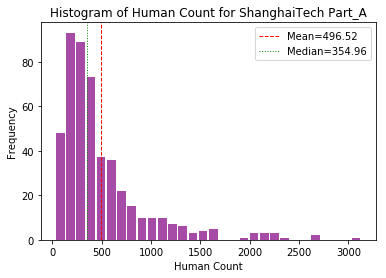

In [9]:

# Calculate mean and median
mean = np.round(np.mean(crowd_counts_partA),2)
median = np.round(np.median(crowd_counts_partA),2)


# Create histogram
n, bins, patches = plt.hist(crowd_counts_partA, bins=30, color='purple', alpha=0.7, rwidth=0.85)

# Add labels and title
plt.xlabel('Human Count')
plt.ylabel('Frequency')
plt.title('Histogram of Human Count for ShanghaiTech Part_A')

# Add mean and median lines
print(mean,median)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean=496.52')
plt.axvline(median, color='green', linestyle='dotted', linewidth=1, label=f'Median=354.96')

# Add legend
plt.legend()

# Show plot
plt.show()

In [2]:
crowd_counts2 = pd.read_csv('CSV/B_on_B_test.csv', sep="\t")

# Calculate mean and median
mean = np.mean(crowd_counts2["y_true"])
median = np.median(crowd_counts2["y_true"])

# Create histogram
n, bins, patches = plt.hist(crowd_counts2["y_true"], bins=30, color='purple', alpha=0.7, rwidth=0.85)

# Add labels and title
plt.xlabel('Human Count')
plt.ylabel('Frequency')
plt.title('Histogram of Human Count for ShanghaiTech Part_A')

# Add mean and median lines
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean={np.round(mean,2)}')
plt.axvline(median, color='green', linestyle='dotted', linewidth=1, label=f'Median={np.round(median,2)}')

# Add legend
plt.legend()

# Show plot
plt.show()

NameError: name 'plt' is not defined

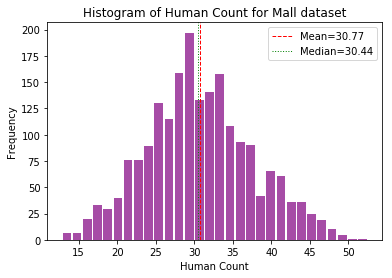

In [7]:
crowd_counts1 = pd.read_csv('CSV/B_on_frames_test.csv')
# Calculate mean and median
mean = np.mean(crowd_counts1["y_true"])
median = np.median(crowd_counts1["y_true"])

# Create histogram
n, bins, patches = plt.hist(crowd_counts1["y_true"], bins=30, color='purple', alpha=0.7, rwidth=0.85)

# Add labels and title
plt.xlabel('Human Count')
plt.ylabel('Frequency')
plt.title('Histogram of Human Count for Mall dataset')

# Add mean and median lines
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean={np.round(mean,2)}')
plt.axvline(median, color='green', linestyle='dotted', linewidth=1, label=f'Median={np.round(median,2)}')

# Add legend
plt.legend()

# Show plot
plt.show()

In [13]:
crowd_counts1["y_true"].astype("int").to_csv("CSV\labels.csv", index=False)